# library import

In [91]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib import rc
import warnings

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore", category=UserWarning)

This is a Mac or Linux environment.


In [7]:
files = glob('./data/output/*.csv')
files

['./data/output/traffic_f.csv',
 './data/output/welfare_f.csv',
 './data/output/apartments_f.csv',
 './data/output/medical_f.csv',
 './data/output/culture_f.csv']

In [16]:
traffic = pd.read_csv(files[0])
welfare = pd.read_csv(files[1])
apartments = pd.read_csv(files[2])
medical = pd.read_csv(files[3])
culture = pd.read_csv(files[4])

In [22]:
point = pd.DataFrame(data={
    'medical' : [5],
    'traffic' : [4],
    'culture' : [3],
    'welfare' : [2],
    'apartments' : [1]
})

point

,medical,traffic,culture,welfare,apartments
0,5,4,3,2,1


In [59]:
raw_hospital = pd.read_excel('./data/상급종합병원_및_종합병원_입원의료_이용_현황_성__연령__혼인상태__20241221032357.xlsx')
raw_hospital.head(10)

,특성별(1),특성별(2),의료기관별(1),2019,2019.1,2020,2020.1,2021,2021.1
0,특성별(1),특성별(2),의료기관별(1),환자수 (명),백분율 (%),환자수 (명),백분율 (%),환자수 (명),백분율 (%)
1,계,소계,상급종합병원,615,100,521,100,324,100
2,NaN,NaN,종합병원,609,100,547,100,614,100
3,성별,남,상급종합병원,146,23.7,155,29.7,158,48.9
4,NaN,NaN,종합병원,299,49.1,241,44,263,42.8
5,NaN,여,상급종합병원,469,76.3,366,70.3,166,51.1
6,NaN,NaN,종합병원,310,50.9,306,56,351,57.2
7,연령별,10세 미만,상급종합병원,23,3.7,18,3.5,11,3.4
8,NaN,NaN,종합병원,51,8.4,24,4.3,23,3.8
9,NaN,10~19세,상급종합병원,273,44.4,202,38.8,11,3.4


In [86]:
hospital = raw_hospital.drop(columns='특성별(1)', index=[0,1,2])
hospital.rename(columns={'특성별(2)' : "나이", "의료기관별(1)" : "의료기관"}, inplace=True)

In [87]:
sang = hospital[hospital['의료기관'] == '상급종합병원']
jong = hospital[hospital['의료기관'] == '종합병원']

sang.reset_index(inplace=True, drop=True)
jong.reset_index(inplace=True, drop=True)

jong['나이'] = sang['나이']

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_14787/1199367920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jong['나이'] = sang['나이']


In [88]:
columns = ['나이', '의료기관', '2019_환자수', '2019_백분율', '2020_환자수', '2020_백분율', '2021_환자수', '2021_백분율']
sang.columns = columns
jong.columns = columns

In [90]:
jong

,나이,의료기관,2019_환자수,2019_백분율,2020_환자수,2020_백분율,2021_환자수,2021_백분율
0,남,종합병원,299,49.1,241,44,263,42.8
1,여,종합병원,310,50.9,306,56,351,57.2
2,10세 미만,종합병원,51,8.4,24,4.3,23,3.8
3,10~19세,종합병원,20,3.3,17,3,25,4
4,20~29세,종합병원,33,5.4,38,7,38,6.3
5,30~39세,종합병원,41,6.6,33,6.1,61,9.9
6,40~49세,종합병원,82,13.4,75,13.7,61,10
7,50~59세,종합병원,98,16.2,109,19.9,134,21.8
8,60~69세,종합병원,99,16.3,88,16.1,126,20.5
9,70~79세,종합병원,114,18.7,91,16.7,94,15.4


In [116]:
df1 = pd.DataFrame(data={
    'Year' : ['2019', '2020', '2021', '2019', '2020', '2021'],
    'Age' : ['65세 미만', '65세 미만','65세 미만','65세 이상','65세 이상','65세 이상'],
    'percentage' : [61.5, 61.9, 65.2, 38.5, 38.1, 34.8]
})

df1

,Year,Age,percentage
0,2019,65세 미만,61.5
1,2020,65세 미만,61.9
2,2021,65세 미만,65.2
3,2019,65세 이상,38.5
4,2020,65세 이상,38.1
5,2021,65세 이상,34.8


In [125]:
df2 = pd.DataFrame(data={
    'Year' : ['2019', '2020', '2021', '2019', '2020', '2021'],
    'Age' : ['65세 미만', '65세 미만','65세 미만','65세 이상','65세 이상','65세 이상'],
    'percentage' : [81.4, 76, 64, 18.6, 24, 36]
})

df2

,Year,Age,percentage
0,2019,65세 미만,81.4
1,2020,65세 미만,76.0
2,2021,65세 미만,64.0
3,2019,65세 이상,18.6
4,2020,65세 이상,24.0
5,2021,65세 이상,36.0


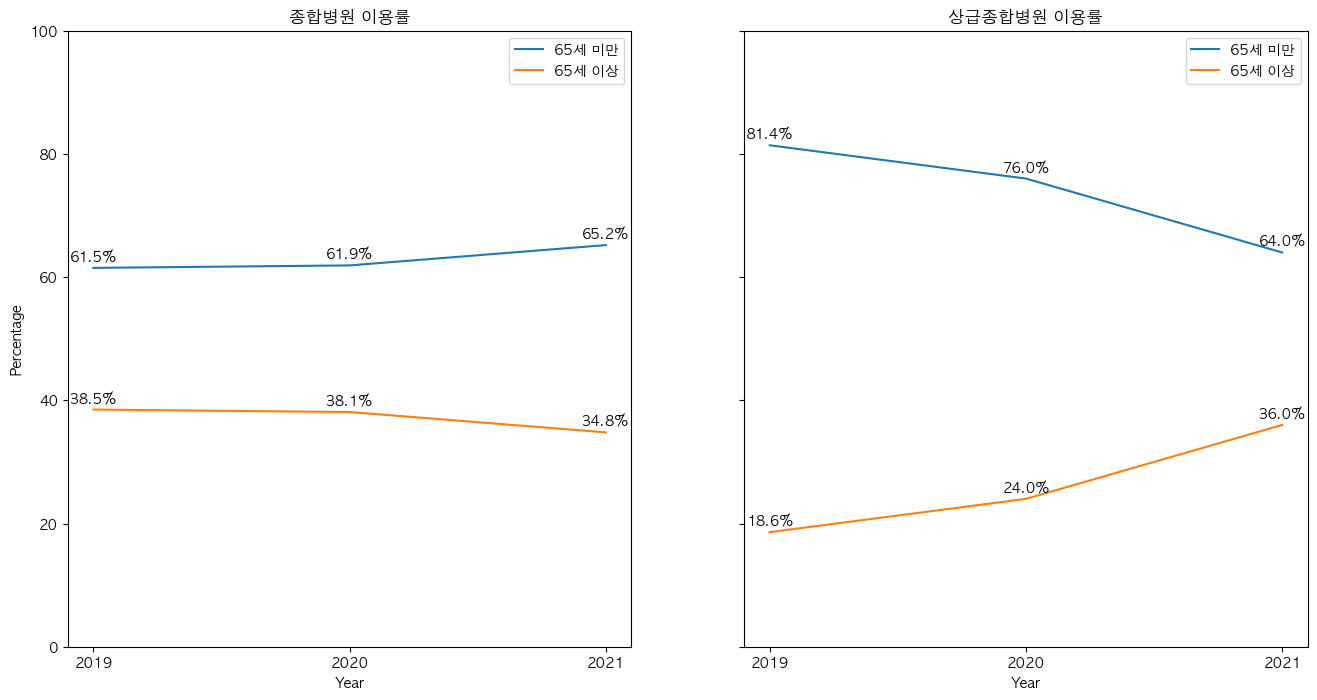

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

sns.lineplot(data=df1, x='Year', y='percentage', hue='Age', ax=axes[0])
axes[0].set_title("종합병원 이용률")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Year")
axes[0].legend(loc='upper right')
axes[0].set_ylim(0, 100)

for i in range(len(df1)):
    axes[0].text(df1['Year'][i], df1['percentage'][i] + 1, f"{df1['percentage'][i]}%", 
                fontsize=10, ha='center')

sns.lineplot(data=df2, x='Year', y='percentage', hue='Age', ax=axes[1])
axes[1].set_title("상급종합병원 이용률")
axes[1].set_ylabel("Percentage")
axes[1].set_xlabel("Year")
axes[1].legend(loc='upper right')

for i in range(len(df2)):
    axes[1].text(df2['Year'][i], df2['percentage'][i] + 1, f"{df2['percentage'][i]}%", 
                fontsize=10, ha='center')
plt.show()

* 65세 이상 병원 이용률이 종합병원인 경우, 소폭 감소하였지만, 상급 종합병원인 경우 대폭 증가하였다.
* 이를 통해 병원의 우선순위가 매우 높은 것을 확인할 수 있다.

In [173]:
station = pd.read_excel('./data/응용 지표(대중교통 이용인원)_20241221.xlsx')
station2 = pd.read_excel('./data/응용 지표(대중교통 이용인원)_20241221 (1).xlsx')
station3 = pd.read_excel('./data/응용 지표(대중교통 이용인원)_20241221 (2).xlsx')

In [180]:
stat = pd.concat([station, station2, station3], ignore_index=True)
stat.drop(index=[0, 2, 4], inplace=True)
stat.reset_index(drop=True, inplace=True)
stat

,시도코드,시도,년,합계,~,경로,국가유공자,어린이,외국인,일반인,장애인,청소년
0,11,서울특별시,2019,1443145759,3,112346401,2519049,16782733,6794548,1212703828,23751586,68247611
1,11,서울특별시,2020,1098488964,13,83342527,1957404,6998296,1051000,947871176,17900392,39368156
2,11,서울특별시,2021,1105857809,10,89546629,1926232,7882250,356934,943934844,17504976,44705934


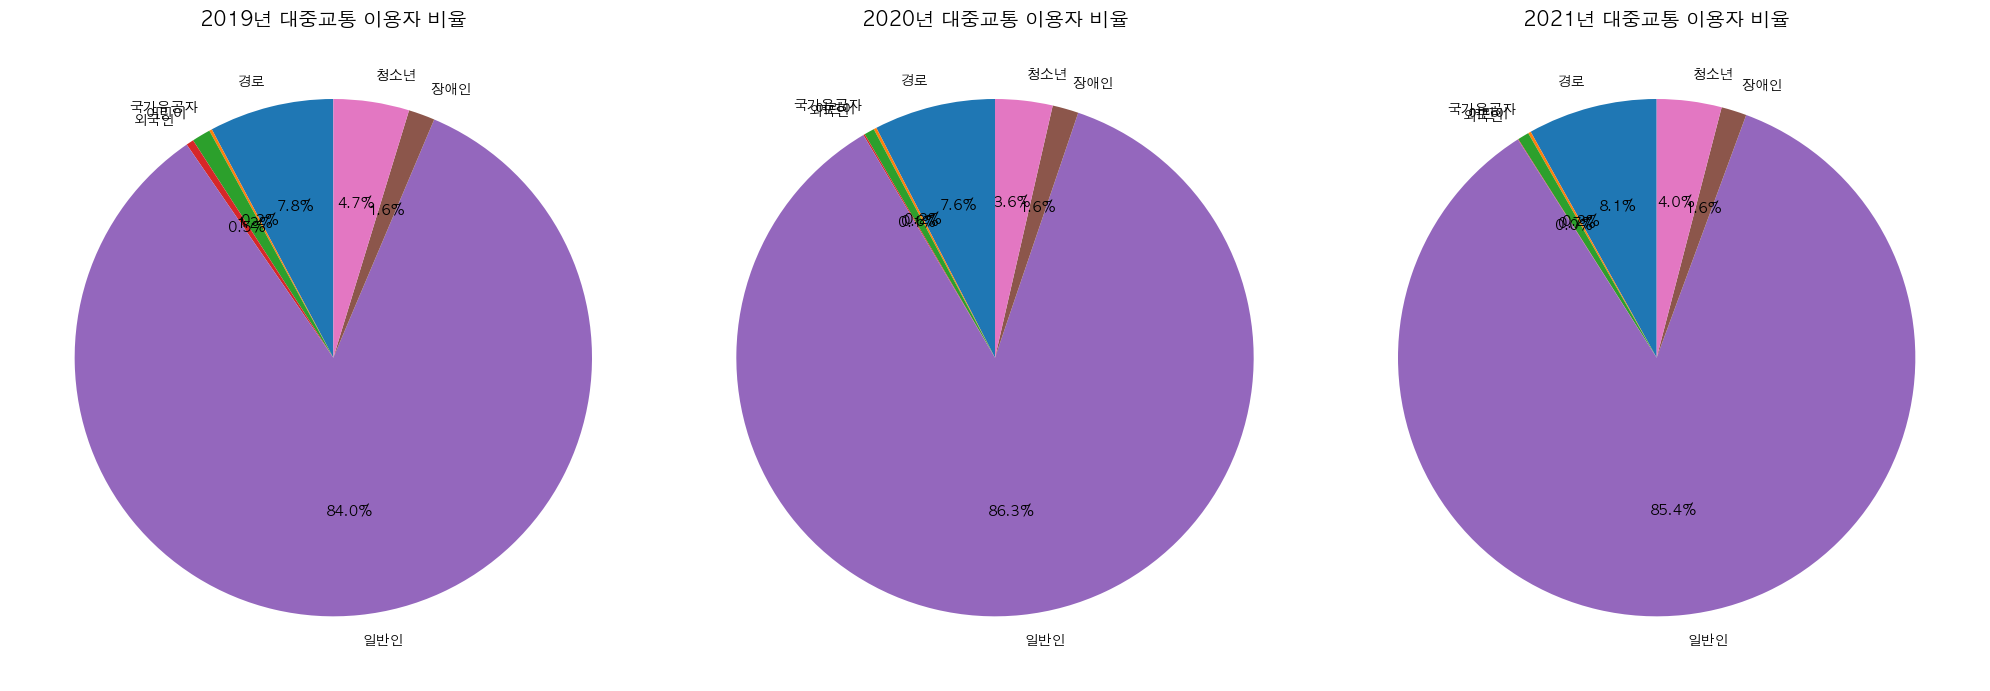

In [185]:
categories = ["경로", "국가유공자", "어린이", "외국인", "일반인", "장애인", "청소년"]

# Subplots 설정
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# 연도별 파이 차트 생성
for idx, year in enumerate([2019, 2020, 2021]):
    year_data = stat[stat["년"] == year]
    values = year_data[categories].iloc[0]
    axes[idx].pie(
        values,
        labels=categories,
        autopct="%.1f%%",
        startangle=90,
        colors=plt.cm.tab10.colors,
    )
    axes[idx].set_title(f"{year}년 대중교통 이용자 비율", fontsize=14)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()